<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/pyintro3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python入門(3)

- 数値計算ライブラリ numpy
- グラフ描画ライブラリ matplotlib
- データ操作ライブラリ pandas

このテキストは [京大 プログラミング演習 Python 2021](http://hdl.handle.net/2433/265459) 第14章を参考にしています。説明が足りないところはリンク先のテキストで補ってください。

Pythonと各種ライブラリの関係

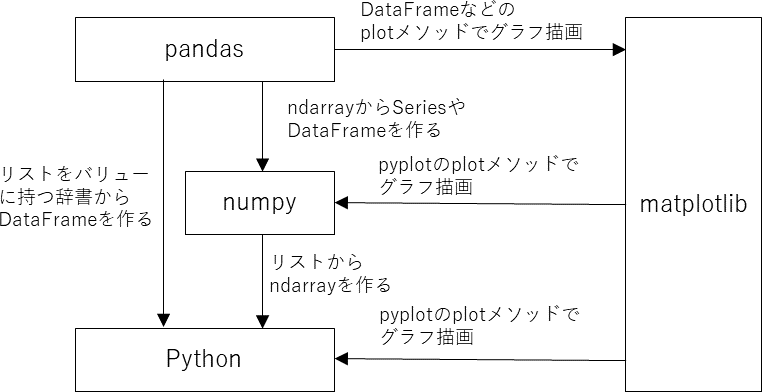

## ライブラリの使用準備

ライブラリを使用可能にするには、インポートする必要があります。書式は `import ライブラリ名 as 別名` です。 よく使われるライブラリは別名もほぼ決まっており、これ以外の別名を使うと他人がコードを読むときに混乱します。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ライブラリ中の特定のクラスやメソッドのみをインポートするときは `from ライブラリ名 import 対象` と書きます。

## Notebookの設定変更

このnotebookでは小数点以下の表示を3桁に制限して見やすく表示します。

In [ ]:
%precision 3

'%.3f'

## 数値計算ライブラリ numpy

numpyは型付き多次元配列（ベクトル、行列、テンソル）に対して数学的な操作を高速に行うライブラリです。

### numpyの基本データ型: ndarray

numpyでは多次元配列を[ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html)というデータ形式で表します。ndarrayは見た目はPythonのリストと同じですが、すべての要素が同じ型の固定長のアレイです。ndarrayはPythonのリストを引数としてnp.arrayメソッドで作成することができます。

以下の例で、定義時に要素のひとつを浮動小数点数に変えて、すべての要素型がどのように変わるか確かめてください。なお、Pythonのオブジェクトの型はtypeで表示させることができます。そしてndarrayについては、テンソルとしての階数（C言語の多次元配列では次元数とよんでいるもの）はndim、サイズはshape、要素型はdtypeでそれぞれ調べることができます。

In [ ]:
arr1 = np.array([1, 2, 3])
arr1

array([1, 2, 3])

In [ ]:
type(arr1)

numpy.ndarray

In [ ]:
# ベクトルは1階のテンソル
arr1.ndim

1

In [ ]:
# テンソルのサイズ
arr1.shape

(3,)

テンソルのサイズは階数を要素の個数とするタプルで表現されます。1階のテンソルの場合、要素数が1つのタプルなので `(要素,)` と表示されます。一見おかしな表示ですが、カンマがなければ優先順位を示す括弧で要素が囲われているものと区別がつきません。

In [ ]:
# ndarrayの要素のデータ型
arr1.dtype

dtype('int64')

浮動小数点数の行列を作って、上記のそれぞれを値を確認してみてください。

In [ ]:
arr2 = np.array([[1.3, 2.5, 3.1], [4.0, 5.1, 6.9]])
print(arr2)
print('type: ', type(arr2))
print('ndim: ', arr2.ndim)
print('shape: ', arr2.shape)
print('dtype: ', arr2.dtype)

[[1.3 2.5 3.1]
 [4.  5.1 6.9]]
type:  <class 'numpy.ndarray'>
ndim:  2
shape:  (2, 3)
dtype:  float64


### ndarrayへのアクセス

ndarrayに対する要素へのアクセスはPythonのリストと同様で、インデックスやスライスを用います。

In [ ]:
# インデックスによる参照
arr1[1] = 15
arr1

array([ 1, 15,  3])

In [ ]:
# スライスを用いた参照
arr2[0:2, 0:2]

array([[1.3, 2.5],
       [4. , 5.1]])

### ndarrayの作成

特定の初期値や乱数を要素として、指定のサイズのndarrayを作ることができます。

In [ ]:
# zerosは初期値0で多次元配列を作成。初期値1はones
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
# 乱数（0から1までの一様分布）で多次元配列の初期値を与える
np.random.rand(3, 3)

array([[0.962, 0.423, 0.634],
       [0.324, 0.17 , 0.4  ],
       [0.441, 0.43 , 0.35 ]])

In [ ]:
# 乱数（平均0、分散1の標準正規分布）で配列の初期値を与える
arr3 = np.random.randn(10)
print(arr3)

[ 1.495 -1.171 -0.411  0.574 -0.83   0.159 -0.343 -2.162 -0.207 -0.183]


### ブールインデックス参照

ndarrayに対して条件式を適用すると、その条件に対する True or False を要素とする同サイズのndarray （ブールインデックス）が得られます。

In [ ]:
print(arr3 > 0)

[ True False False  True False  True False False False False]


ndarrayの要素参照にブールインデックスを用いると、Trueに対応する要素だけを取り出すことができます。

In [ ]:
arr3[arr3 > 0]

array([1.495, 0.574, 0.159])

### 行列計算

2階のndarrayに対して様々な行列計算が可能です。線形代数の代表的な演算は[np.linalg](https://numpy.org/doc/stable/reference/routines.linalg.html)で定義されています。

In [ ]:
m1 = np.array([[1, 2], [3, 4]])
m2 = np.array([[5, 6], [7, 8]])

print('original:')
print(m1)
# 転置
print('transposed:')
print(m1.T)
# 逆行列
print('inverse:')
print(np.linalg.inv(m1))
# 対角要素
print('diag:')
print(np.diag(m1))
# 行列式
print('det:')
print(np.linalg.det(m1))
# 固有値
print('eigenvalues:')
print(np.linalg.eig(m1))
# 和
print('sum:')
print(m1 + m2)
# 積
print('product:')
print(m1 @ m2)

original:
[[1 2]
 [3 4]]
transposed:
[[1 3]
 [2 4]]
inverse:
[[-2.   1. ]
 [ 1.5 -0.5]]
diag:
[1 4]
det:
-2.0000000000000004
eigenvalues:
(array([-0.372,  5.372]), array([[-0.825, -0.416],
       [ 0.566, -0.909]]))
sum:
[[ 6  8]
 [10 12]]
product:
[[19 22]
 [43 50]]


### 練習問題1

numpy.linalg.solveを用いて、2元1次方程式の解を求めるコードを記述せよ。

## グラフ描画ライブラリ matplotlib


[matplotlib](https://matplotlib.org/)はグラフを描画するためのライブラリです。そのサブモジュールであるpyplotはMATLABに似たAPIを提供するもので、通常はこのpyplotを使います。pyplotでは関数のグラフ、散布図、ヒストグラムなどを簡単に作成することができます。

### 関数のグラフ

関数のグラフはplotメソッドの第1引数にx軸方向の値、第2引数にy軸方向の値、第3引数は線の種類（省略すれば黒の実線）を与えます。

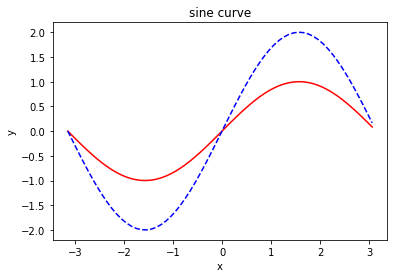

In [ ]:
import math
x = np.arange(-math.pi, math.pi, 0.1)
y = np.sin(x)
plt.title('sine curve')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'r-')
plt.plot(x, y*2, 'b--')

### 散布図

散布図を描く場合は、scatterメソッドを使います。

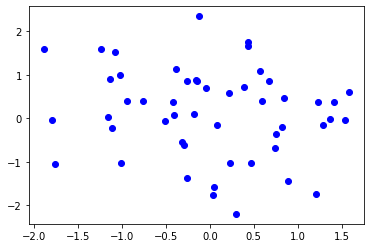

In [ ]:
# 平均(0,0)、分散1の正規分布から2次元データを50個生成
data = np.random.randn(50, 2)
# マーカの色と形を指定して散布図で表示
plt.scatter(data[:,0], data[:,1], c='blue',marker='o')

### ヒストグラム

ヒストグラムはhistメソッドを使います。

(array([  1.,   0.,   0.,   2.,   3.,  13.,  20.,  50.,  72.,  80., 129.,
        120., 140., 121.,  96.,  62.,  52.,  21.,   8.,  10.]),
 array([-4.042, -3.707, -3.372, -3.038, -2.703, -2.369, -2.034, -1.7  ,
        -1.365, -1.031, -0.696, -0.361, -0.027,  0.308,  0.642,  0.977,
         1.311,  1.646,  1.98 ,  2.315,  2.649]),
 <a list of 20 Patch objects>)

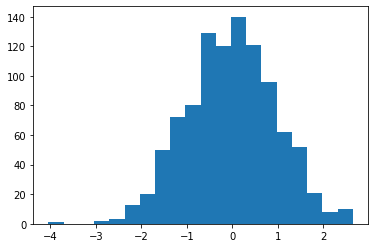

In [ ]:
# 平均0、分散1の正規分布から1次元データを1000個生成
data = np.random.randn(1000)
# データを20個のbinに分割して、度数・binの端の値を返し、グラフを表示
plt.hist(data, bins=20)

### 練習問題2

平均(0,0)、分散1の正規分布、および平均(2,2)、分散1の正規分布からそれぞれ2次元データを50個ずつ生成し、どちらの分布から生成されたデータであるか区別がつくような散布図を表示せよ。

## データ操作ライブラリ pandas

[pandas](https://pandas.pydata.org/)は表計算ソフトやリレーショナルデータベースで管理されているデータをPythonに読み込んで処理するためのライブラリです。各種のデータ加工メソッドが提供されています。参考）[pandasのcheatsheet](https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

pandasのデータ形式は、ベクトルが Seriesオブジェクト、行列がDataFrameオブジェクトです。

Google ColabはDataFrameのインタラクティブな表示機能を持っているので、それを有効にします。

importを実行しなくても、DataFrameを表示してから右上に出てくるアイコンをクリックするだけでもインタラクティブな表示になります。

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

### データの読み込み

[カリフォルニア大学アーバイン校の機械学習用データリポジトリ](https://archive.ics.uci.edu/ml/index.php)からirisとよばれるデータをダウンロードします。irisデータは、アヤメの種類(setosa, versicolor, virginica)を、花弁・萼のそれぞれの幅・長さという4つの特徴から識別するものです。

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2022-04-18 06:40:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.1’

iris.data.1         100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-04-18 06:40:44 (104 MB/s) - ‘iris.data.1’ saved [4551/4551]



ダウンロードしたファイルの拡張子はdataですが、中身はヘッダなしのcsvファイルです。pandasのread_csvメソッドで列名を付けてDataFrame型として読み込みます。

In [ ]:
df = pd.read_csv('iris.data', header=None, names=['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'target'])
df

,sepallength,sepalwidth,petallength,petalwidth,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


DataFrame型は柔軟なので、整数・浮動小数点数・文字列などが混在していても、そのままの型で読み込むことができます。

またread_csvメソッドも、1行目がヘッダとなっているcsvファイルの読み込みや、特定の列の読み込みなど、引数の指定によって柔軟にファイル読み込みが可能です。

### 要素へのアクセス・表示

DataFrameの列要素へは列名でアクセスできます。

In [ ]:
df['petallength']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petallength, Length: 150, dtype: float64

データのプロットはDataFrameのplotメソッドで行うことができます。

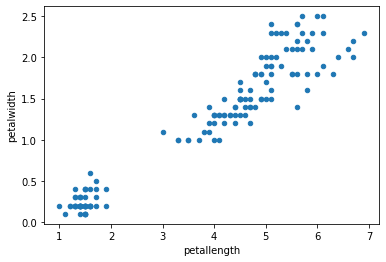

In [ ]:
df.plot.scatter('petallength','petalwidth')

### 練習問題3

Google Colabにダウンロードしたiris.dataを開いて、適当なデータの適当な要素を削除してから再度データを読み込んで、どのように処理されているか確認してください。次にその欠損値を適切な値で埋めるコードを記述してください。

## 正解

### 練習問題1

In [ ]:
a = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])
x = np.linalg.solve(a, b)
x

array([-1.,  1.])

### 練習問題2

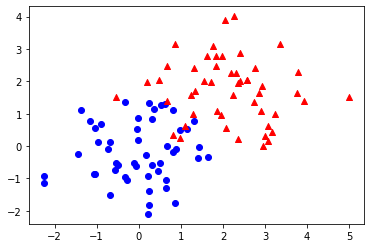

In [ ]:
data1 = np.random.randn(50, 2)
data2 = np.random.randn(50, 2) + [2,2]
plt.scatter(data1[:,0], data1[:,1], c='blue',marker='o')
plt.scatter(data2[:,0], data2[:,1], c='red',marker='^')

### 練習問題3

ファイルエクスプローラでiris.dataをダブルクリックして開き、適当なデータを削除してから読み込みます。

In [ ]:
df = pd.read_csv('iris.data', header=None, names=['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'target'])
df

,sepallength,sepalwidth,petallength,petalwidth,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


欠損値を列の中央値で埋める

In [ ]:
df.fillna(df.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,sepallength,sepalwidth,petallength,petalwidth,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
